# Decision Tree with Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = datasets.load_iris()
X = data.data
y = data.target

In [3]:
feature_names=data.feature_names
class_names = data.target_names
random_state = 123
print('Classes to predict: ', class_names)
print('Features available: ', feature_names)

Classes to predict:  ['setosa' 'versicolor' 'virginica']
Features available:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify=y, test_size=0.25)

### Model

In [5]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

In [6]:
y_pred =  clf.predict(X_test)

In [7]:
clf.score(X_train, y_train), metrics.accuracy_score(y_test, y_pred)

(1.0, 0.9736842105263158)

In [8]:
dict(zip(data.feature_names, clf.feature_importances_))

{'sepal length (cm)': 0.0,
 'sepal width (cm)': 0.01621291617914826,
 'petal length (cm)': 0.9022703258132234,
 'petal width (cm)': 0.08151675800762825}

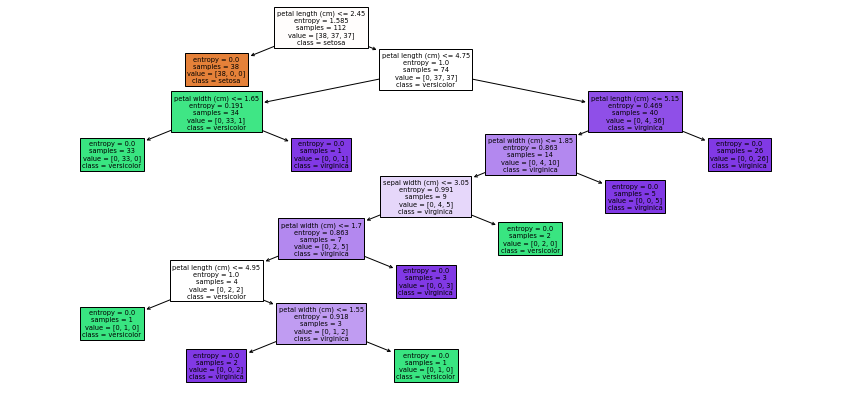

In [9]:
plt.figure(figsize=(15,7))
plot_tree(clf, feature_names=data.feature_names, class_names=class_names, filled=True)
plt.show()

### Plot Accuracy with Depth

In [10]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

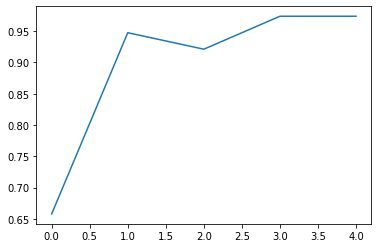

In [11]:
plt.plot(accuracy)
plt.show()

## After Feature Selection

In [12]:
X_train = X_train[:,2:]

In [13]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

In [14]:
y_pred =  clf.predict(X_train)
clf.score(X_train, y_train)

0.9910714285714286

<AxesSubplot:>

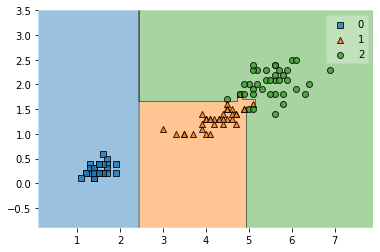

In [15]:
plot_decision_regions(X_train, y_train, clf)

In [16]:
dict(zip(data.feature_names, clf.feature_importances_))

{'sepal length (cm)': 0.9245172793408639,
 'sepal width (cm)': 0.07548272065913604}

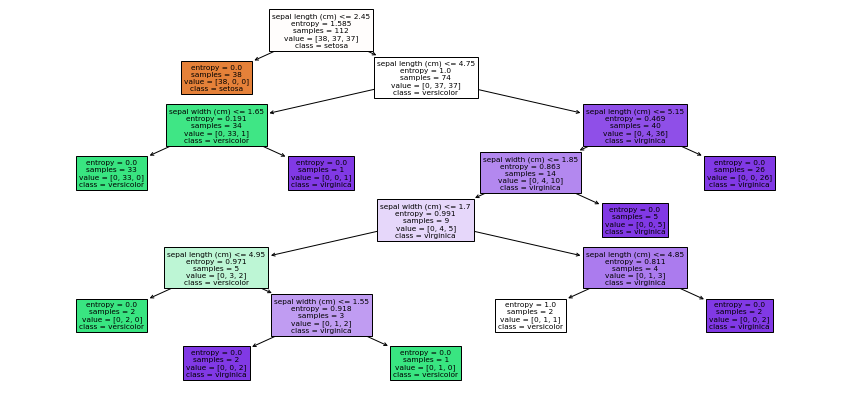

In [17]:
plt.figure(figsize=(15,7))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()